#_gCastle Tool Colab Notebook Template_

## Introduction
[gCastle](https://github.com/huawei-noah/trustworthyAI/tree/f96c9b52d5e38c74c14969dbf6c48b380f3c3dab/gcastle) is a causal structure learning(CSL) tool chain developed by Huawei Noah's Ark Lab. The package contains various functionalities related to causal learning and evaluation, including:
![castle](https://drive.google.com/uc?id=1MwURFTgB6hJvsM3-YhsGOMyz5xs6vMJ3)

## Evaluation:
* Various commonly used metrics for causal structure learning, including F1, SHD, FDR, TPR, FDR, NNZ, etc.

* Heatmap(est_graph, truth_graph)





# __Step 1: Get start__


* Mounting drive
* Setting environment
* Installing packages

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/NCPOP/Causal_Models_Learning/Test/Results/TwoDim/Gcastle_Results/")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### for colab ###
# To execute the notebook directly in colab make sure your MOSEK license file is in one the locations
#
# /content/mosek.lic   or   /root/mosek/mosek.lic
#
# inside this notebook's internal filesystem.
# Install MOSEK and ncpol2sdpa if not already installed

import os
os.environ['MOSEKLM_LICENSE_FILE']="/content/drive/MyDrive/Colab Notebooks/NCPOP/"

In [ ]:
!pip install gcastle==1.0.3rc2
!pip install networkx==2.5.1
!pip install mosek torch
!pip install ncpol2sdpa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_syste

# __Step 2: Input training data__
* Real data

* Synthetic data

## Read LinearGauss_6_15 data

In [ ]:
import numpy as np
import pandas as pd

File_PATH = "/content/drive/MyDrive/Colab Notebooks/NCPOP/Causal_Models_Learning/Test/Examples/Test_data/"
# file_name = 'Krebs_Cycle_16_43_TS'

file_name = 'linearGauss_6_15'
# file_name = 'linearGauss_10_20'
# file_name = 'NonlinearGauss_6_15'
# file_name = 'NonlinearGauss_10_20'
data = np.load(File_PATH+file_name+'.npz')
X = data['x']
true_dag = data['y']
print(X, true_dag)

[[ 8.665e-01  1.924e+00 -6.816e+00 -2.305e+00 -7.145e+00  2.090e+00]
 [ 6.982e-01  9.911e-01 -3.660e+00 -9.425e-01 -6.728e+00  8.597e-01]
 [-5.116e-01  3.806e-01  9.820e-01  4.091e-01  3.640e+00  7.874e-01]
 [ 1.044e-01 -7.478e-01  4.407e+00  1.593e+00  6.593e+00 -1.035e+00]
 [-1.457e+00 -1.318e+00  5.959e+00  3.081e+00  1.121e+01 -2.001e-01]
 [ 1.280e+00  1.333e+00 -9.019e+00 -2.400e+00 -1.121e+01  3.284e+00]
 [-9.025e-01 -6.845e-01  3.859e-01 -4.006e-01 -7.040e-01 -8.001e-02]
 [ 2.201e+00  1.256e+00 -2.151e+00  2.831e-01 -3.003e+00  4.081e-01]
 [-3.571e+00  4.967e-01  2.041e+00  2.796e-01  1.547e+01  3.617e+00]
 [ 7.809e-01  3.293e-01 -3.973e+00 -1.747e+00 -9.098e+00 -2.628e-01]
 [-7.380e-01 -1.190e-03  1.918e+00 -3.664e-01  4.376e+00 -1.207e+00]
 [-5.062e-01 -3.073e-01  5.626e+00  1.642e+00  1.080e+01 -1.089e+00]
 [-4.404e-01 -1.835e-01 -5.955e-01 -4.853e-01 -1.015e-01  2.859e-01]
 [-2.338e+00 -5.530e-01  6.507e+00  1.918e+00  1.652e+01 -6.782e-01]
 [-1.221e+00 -1.557e-01 -1.292e+00

# __Step 3: Methods__

# IID/Constraint-based

##__M 1.1: PC_variant_stable__
* A classic causal discovery algorithm based on conditional independence tests

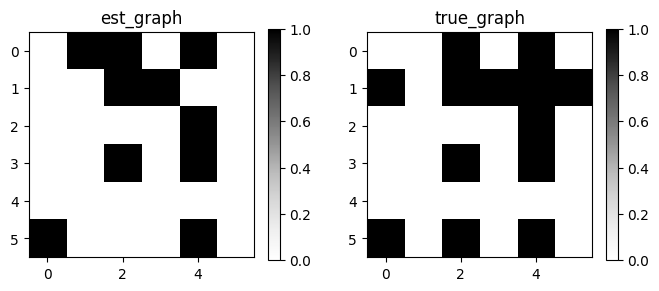

{'fdr': 0.1, 'tpr': 0.6923, 'fpr': 0.5, 'shd': 4, 'nnz': 10, 'precision': 0.9, 'recall': 0.6923, 'F1': 0.7826, 'gscore': 0.6154}


In [ ]:
from castle.algorithms import PC
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import load_dataset

# X, true_dag, _ = load_dataset(name='IID_Test')
pc = PC(variant='stable')
pc.learn(X)
GraphDAG(pc.causal_matrix, true_dag, save_name='Result_pc_variant_stable')
met = MetricsDAG(pc.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_pc_variant_stable.csv')

##__M 1.2: PC_variant_parallel__

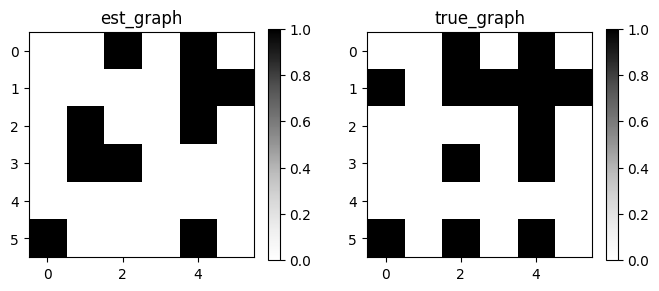

{'fdr': 0.2, 'tpr': 0.6154, 'fpr': 1.0, 'shd': 5, 'nnz': 10, 'precision': 0.8, 'recall': 0.6154, 'F1': 0.6957, 'gscore': 0.4615}


In [ ]:
pc = PC(variant='parallel')
pc.learn(X, p_cores=2)
GraphDAG(pc.causal_matrix, true_dag, save_name='Result_pc_variant_parallel')
met = MetricsDAG(pc.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_pc_variant_parallel.csv')

In [ ]:
from castle.algorithms.pc.pc import find_skeleton
from castle.datasets import load_dataset

# true_dag, X = load_dataset(name='iid_test')
# X,true_dag, _ = load_dataset('IID_Test')
skeleton, sep_set = find_skeleton(X, 0.05, 'fisherz')
print(skeleton)


ValueError: The type of param `ci_test` expect callable,but got <class 'str'>.

# IID/Function-based

##__M2: ANM-Nonlinear__
* Nonlinear causal discovery with additive noise models

### M 2.1: ANM-GPR
* Estimator based on Gaussian Process Regressor

In [ ]:
import numpy as np
from sklearn.preprocessing import scale

x = np.random.rand(10).reshape((-1, 1))
y = np.random.rand(10)#.reshape((-1, 1))
gpr = GPR(alpha=1e-10)
y_pred = gpr.estimate(x, y)
print(x, y_pred)

[[0.06 ]
 [0.422]
 [0.376]
 [0.68 ]
 [0.47 ]
 [0.322]
 [0.919]
 [0.15 ]
 [0.059]
 [0.697]] [0.406 0.769 0.588 0.472 0.902 0.377 0.192 0.507 0.396 0.419]


In [ ]:
class ANMNonlinear(BaseLearner):
    def __init__(self, alpha=0.05):
        super(ANMNonlinear, self).__init__()
        self.alpha = alpha

    def learn(self, data, columns=None, regressor=GPR(), test_method=hsic_test, **kwargs):

        self.regressor = regressor

        # create learning model and ground truth model
        data = Tensor(data, columns=columns)

        node_num = data.shape[1]
        self.causal_matrix = Tensor(np.zeros((node_num, node_num)),
                                    index=data.columns,
                                    columns=data.columns)

        for i, j in combinations(range(node_num), 2):
            x = data[:, i].reshape((-1, 1))
            y = data[:, j].reshape((-1, 1))

            flag = test_method(x, y, alpha=self.alpha)
            if flag == 1:
                continue
            # test x-->y
            flag = self.anm_estimate(x, y, regressor=regressor,
                                     test_method=test_method)
            if flag:
                self.causal_matrix[i, j] = 1
            # test y-->x
            flag = self.anm_estimate(y, x, regressor=regressor,
                                     test_method=test_method)
            if flag:
                self.causal_matrix[j, i] = 1

    def anm_estimate(self, x, y, regressor=GPR(), test_method=hsic_test):

        x = scale(x).reshape((-1, 1))
        y = scale(y).reshape((-1, 1))

        y_predict = regressor.estimate(x, y)
        flag = test_method(y - y_predict, x, alpha=self.alpha)
        print(flag)

        return flag

In [ ]:
    >>> from castle.common import GraphDAG
    >>> from castle.metrics import MetricsDAG
    >>> from castle.datasets import DAG, IIDSimulation
    >>> from castle.algorithms.anm import ANMNonlinear

    >>> weighted_random_dag = DAG.erdos_renyi(n_nodes=6, n_edges=10,
    >>>                                      weight_range=(0.5, 2.0), seed=1)
    >>> dataset = IIDSimulation(W=weighted_random_dag, n=1000,
    >>>                         method='nonlinear', sem_type='gp-add')
    >>> true_dag, X = dataset.B, dataset.X

    >>> anm = ANMNonlinear(alpha=0.05)
    >>> anm.learn(data=X)

    >>> # plot predict_dag and true_dag
    >>> GraphDAG(anm.causal_matrix, true_dag, show=False, save_name='result')

    you can also provide more parameters to use it. like the flowing:
    >>> from sklearn.gaussian_process.kernels import Matern, RBF
    >>> kernel = Matern(nu=1.5)
    >>> # kernel = 1.0 * RBF(1.0)
    >>> anm = ANMNonlinear(alpha=0.05)
    >>> anm.learn(data=X, regressor=GPR(kernel=kernel))
    >>> # plot predict_dag and true_dag
    >>> GraphDAG(anm.causal_matrix, true_dag, show=False, save_name='result')

In [ ]:
#from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from sklearn.gaussian_process.kernels import Matern, RBF
from sklearn.preprocessing import scale
from itertools import combinations
from castle.common import BaseLearner, Tensor
from castle.common.independence_tests import hsic_test
from math import sqrt
from castle.common import GraphDAG
from castle.metrics import MetricsDAG

from castle.datasets import DAG, IIDSimulation
from castle.datasets import load_dataset
from castle.algorithms import ANMNonlinear
'''
weighted_random_dag = DAG.erdos_renyi(n_nodes=6, n_edges=10,
                                    weight_range=(0.5, 2.0), seed=1)
dataset = IIDSimulation(W=weighted_random_dag, n=1000,method='nonlinear', sem_type='gp-add')


weighted_random_dag = DAG.erdos_renyi(n_nodes=6, n_edges=15,
                                     weight_range=(0.5, 2.0), seed=1)
dataset = IIDSimulation(W=weighted_random_dag, n=1000,
                        method='nonlinear', sem_type='gp-add')
true_dag, X = dataset.B, dataset.X

# X, true_dag, _ = load_dataset(name='IID_Test')
'''
# print(X, true_dag)
anm = ANMNonlinear(alpha=0.05)
anm.learn(data=X)

# plot predict_dag and true_dag
met = MetricsDAG(anm.causal_matrix, true_dag)
print(met.metrics)
GraphDAG(anm.causal_matrix, true_dag, save_name='Result_anm')
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_anm.csv')

KeyboardInterrupt: 

###  M 2.2: ANM-GPR-Kernel

In [ ]:
from sklearn.preprocessing import scale
from itertools import combinations
from sklearn.gaussian_process import GaussianProcessRegressor
from castle.common import BaseLearner, Tensor
from castle.common.independence_tests import hsic_test


class GPR(object):

    def __init__(self, **kwargs):
        super(GPR, self).__init__()
        self.regressor = GaussianProcessRegressor(**kwargs)

    def estimate(self, x, y):
        self.regressor.fit(x, y)
        y_predict = self.regressor.predict(x)

        return y_predict


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The opti

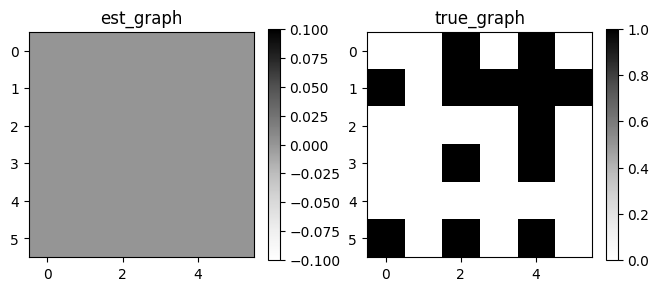

{'fdr': 0.0, 'tpr': 0.0, 'fpr': 0.0, 'shd': 13, 'nnz': 0, 'precision': nan, 'recall': 0.0, 'F1': nan, 'gscore': 0.0}


In [ ]:
from sklearn.gaussian_process.kernels import Matern, RBF
# from sklearn.gaussian_process import GaussianProcessRegressor as GPR

kernel = Matern(nu=1.5)
# kernel = 1.0 * RBF(1.0)
anm = ANMNonlinear(alpha=0.05)
anm.learn(data=X[:30], regressor=GPR(kernel=kernel))
# plot predict_dag and true_dag
met = MetricsDAG(anm.causal_matrix, true_dag)
GraphDAG(anm.causal_matrix, true_dag, save_name='Result_anm_kernel')
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_anm_kernel.csv')

In [ ]:
import numpy as np
from castle.algorithms.anm import ANMNonlinear
np.random.seed(1)
x = np.random.rand(500, 2)
anm = ANMNonlinear(alpha=0.05)
print(anm.anm_estimate(x[:, [0]], x[:, [1]]))

1


###  M 2.3: ANM-NCPOP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from itertools import combinations
from castle.common import BaseLearner, Tensor
from castle.common.independence_tests import hsic_test
# from inputlds import*
# from functions import*
from ncpol2sdpa import*
from math import sqrt


class NCPOLR(object):
    """Estimator based on NCPOP Regressor

    References
    ----------
    Quan Zhou https://github.com/Quan-Zhou/Proper-Learning-of-LDS/blob/master/ncpop/functions.py

    Examples
    --------
    """

    def __init__(self, **kwargs):
        super(NCPOLR, self).__init__()

    def estimate_1hidden(self, X, Y):
        """Fit Estimator based on NCPOP Regressor model and predict y or produce residuals.
        The module converts a noncommutative optimization problem provided in SymPy
        format to an SDPA semidefinite programming problem.

        Parameters
        ----------
        X : array
            Variable seen as cause
        Y: array
            Variable seen as effect

        Returns
        -------
        y_predict: array
            regression predict values of y or residuals
        """

        T = len(Y)
        level = 1

        # Decision Variables
        G = generate_operators("G", n_vars=1, hermitian=True, commutative=False)[0]
        f = generate_operators("f", n_vars=T, hermitian=True, commutative=False)
        n = generate_operators("m", n_vars=T, hermitian=True, commutative=False)
        p = generate_operators("p", n_vars=T, hermitian=True, commutative=False)

        # Objective
        obj = sum((Y[i]-f[i])**2 for i in range(T)) + 0.5*sum(p[i] for i in range(T))

        # Constraints
        ine1 = [f[i] - G*X[i] - n[i] for i in range(T)]
        ine2 = [-f[i] + G*X[i] + n[i] for i in range(T)]
        ine3 = [p[i]-n[i] for i in range(T)]
        ine4 = [p[i]+n[i] for i in range(T)]
        ines = ine1+ine2+ine3+ine4

        # Solve the NCPO
        sdp = SdpRelaxation(variables = flatten([G,f,n,p]),verbose = 1)
        sdp.get_relaxation(level, objective=obj, inequalities=ines)
        sdp.solve(solver='mosek')
        #sdp.solve(solver='sdpa', solverparameters={"executable":"sdpa_gmp","executable": "C:/Users/zhouq/Documents/sdpa7-windows/sdpa.exe"})
        print(sdp.primal, sdp.dual, sdp.status)

        if(sdp.status != 'infeasible'):
            print('ok.')
            est_noise = []
            for i in range(T):
                est_noise.append(sdp[n[i]])
            print(est_noise)
            return est_noise
        else:
            print('Cannot find feasible solution.')
            return

    def estimate_2hidden(self, X, Y):
        """Fit Estimator based on NCPOP Regressor model with 2*2 hidden state matrix and predict y or produce residuals.
        The module converts a noncommutative optimization problem provided in SymPy
        format to an SDPA semidefinite programming problem.

        Parameters
        ----------
        X : array
            Variable seen as cause
        Y: array
            Variable seen as effect

        Returns
        -------
        y_predict: array
            regression predict values of y or residuals
        """

        T = len(Y)
        level = 1

        # Decision Variables
        G = generate_operators("G", n_vars=1, hermitian=True, commutative=False)[0]
        H = generate_operators("H", n_vars=1, hermitian=True, commutative=False)[0]
        Fdash = generate_operators("Fdash", n_vars=2, hermitian=True, commutative=False)
        m = generate_operators("m", n_vars=T, hermitian=True, commutative=False)
        q = generate_operators("q", n_vars=T, hermitian=True, commutative=False)
        p = generate_operators("p", n_vars=T, hermitian=True, commutative=True)
        f = generate_operators("f", n_vars=T, hermitian=True, commutative=True)
        n = generate_operators("n", n_vars=T, hermitian=True, commutative=False)
        u = generate_operators("u", n_vars=T, hermitian=True, commutative=False)

        # Objective
        obj = sum((Y[i]-f[i])**2 for i in range(T)) + 0.0005*sum(p[i]**2 for i in range(T)) + 0.001*sum(q[i]**2 for i in range(T))

        # Constraints
        ine1 = [ f[i] - Fdash[0]*m[i]  - Fdash[1]*m[i-1] - p[i] for i in range(1,T)]
        ine2 = [-f[i] + Fdash[0]*m[i] +Fdash[1]*m[i-1] + p[i] for i in range(1,T)]
        ine3 = [ m[i] - G*m[i-1]  - H*m[i-2] - q[i] for i in range(2,T)]
        ine4 = [-m[i] + G*m[i-1] + H*m[i-2] + q[i] for i in range(2,T)]
        ine5 = [p[i] + n[i] for i in range(T)]
        ine6 = [p[i] - n[i] for i in range(T)]
        ine7 = [q[i] + u[i] for i in range(T)]
        ine8 = [q[i] - u[i] for i in range(T)]

        ines = ine1+ine2+ine3+ine4

        # Solve the NCPO
        sdp = SdpRelaxation(variables = flatten([G,H,Fdash,f,p,m,q]),verbose = 1)
        sdp.get_relaxation(level, objective=obj, inequalities=ines)
        sdp.solve(solver='mosek')
        #sdp.solve(solver='sdpa', solverparameters={"executable":"sdpa_gmp","executable": "C:/Users/zhouq/Documents/sdpa7-windows/sdpa.exe"})
        print(sdp.primal, sdp.dual, sdp.status)

        if(sdp.status != 'infeasible'):
            print('ok.')
            est_noise = []
            for i in range(T):
                est_noise.append(sdp[Y[i]-f[i]+q[i]])
            print(est_noise)
            return est_noise
        else:
            print('Cannot find feasible solution.')
            return



class ANM_NCPO(BaseLearner):
    """
    Nonlinear causal discovery with additive noise models

    Use Estimator based on NCPOP Regressor and independent Gaussian noise,
    For the independence test, we implemented the HSIC with a Gaussian kernel,
    where we used the gamma distribution as an approximation for the
    distribution of the HSIC under the null hypothesis of independence
    in order to calculate the p-value of the test result.

    References
    ----------
    Hoyer, Patrik O and Janzing, Dominik and Mooij, Joris M and Peters,
    Jonas and Schölkopf, Bernhard,
    "Nonlinear causal discovery with additive noise models", NIPS 2009

    Parameters
    ----------
    alpha : float, default 0.05
        significance level be used to compute threshold

    Attributes
    ----------
    causal_matrix : array like shape of (n_features, n_features)
        Learned causal structure matrix.

    Examples
    --------
    """

    def __init__(self, alpha=0.05):
        super(ANM_NCPO, self).__init__()
        self.alpha = alpha

    def learn(self, data,causalmodelling, columns=None, regressor=NCPOLR(),test_method=hsic_test, **kwargs):
        """Set up and run the ANM_NCPOP algorithm.

        Parameters
        ----------
        data: numpy.ndarray or Tensor
            Training data.
        causalmodelling: Modelling type(hidden_state1,hidden_state2,ARMA,Discrete)
        columns : Index or array-like
            Column labels to use for resulting tensor. Will default to
            RangeIndex (0, 1, 2, ..., n) if no column labels are provided.
        regressor: Class
            Nonlinear regression estimator, if not provided, it is NCPOLR.
            If user defined, must implement `estimate` self.method. such as :
                `regressor.estimate(x, y)`
        test_method: callable, default test_method
            independence test self.method, if not provided, it is HSIC.
            If user defined, must accept three arguments--x, y and keyword
            argument--alpha. such as :
                `test_method(x, y, alpha=0.05)`
        """

        self.regressor = regressor

        # create learning model and ground truth model
        data = Tensor(data, columns=columns)

        node_num = data.shape[1]
        self.causal_matrix = Tensor(np.zeros((node_num, node_num)),
                                    index=data.columns,
                                    columns=data.columns)

        for i, j in combinations(range(node_num), 2):
            x = data[:, i]
            y = data[:, j]
            xx = x.reshape((-1, 1))
            yy = y.reshape((-1, 1))

            flag = test_method(xx, yy, alpha=self.alpha)
            if flag == 1:
                continue
            # test x-->y
            flag = self.anmNCPO_estimate(x, y, causalmodelling, regressor = regressor, test_method=test_method)
            if flag:
                self.causal_matrix[i, j] = 1
            # test y-->x
            flag = self.anmNCPO_estimate(y, x, causalmodelling, regressor = regressor, test_method=test_method)
            if flag:
                self.causal_matrix[j, i] = 1

    def anmNCPO_estimate(self, x, y, causalmodelling, regressor=NCPOLR(), test_method=hsic_test):
        """Compute the fitness score of the ANM_NCPOP Regression model in the x->y direction.

        Parameters
        ----------
        x: array
            Variable seen as cause
        y: array
            Variable seen as effect
        causalmodelling: Modelling type(hidden_state1,hidden_state2,ARMA,Discrete)
        regressor: Class
            Nonlinear regression estimator, if not provided, it is NCPOP.
            If user defined, must implement `estimate` self.method. such as :
                `regressor.estimate(x, y)`
        test_method: callable, default test_method
            independence test self.method, if not provided, it is HSIC.
            If user defined, must accept three arguments--x, y and keyword
            argument--alpha. such as :
                `test_method(x, y, alpha=0.05)`
        Returns
        -------
        out: int, 0 or 1
            If 1, residuals n is independent of x, then accept x --> y
            If 0, residuals n is not independent of x, then reject x --> y

        """

        x = scale(x)
        y = scale(y)
        if causalmodelling == 'hidden_state1':
            y_res = regressor.estimate_1hidden(x, y)
        elif causalmodelling == 'hidden_state2':
            y_res = regressor.estimate_2hidden(x, y)
        else:
            print('WRONG MODELLING TYPE')
        #if causalmodelling='ARMA':
        #if causalmodelling='Discrete':


        flag = test_method(np.asarray(y_res).reshape((-1, 1)), np.asarray(x).reshape((-1, 1)), alpha=self.alpha)
        print(flag)

        return flag

The problem has 106 noncommuting Hermitian variables
Calculating block structure...
Estimated number of SDP variables: 5777
Generating moment matrix...
Reduced number of SDP variables: 5777
Processing 14/140 constraints...

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.01            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.01            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

Processing 140/140 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 5777            
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 30628)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  

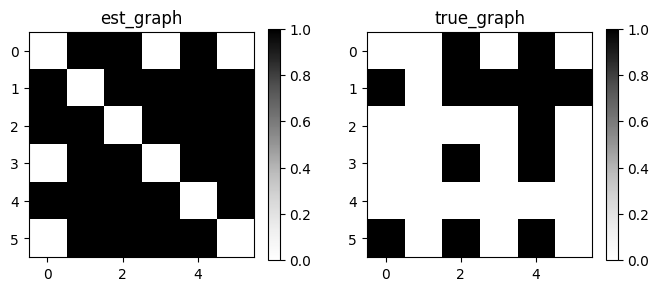

{'fdr': 0.0769, 'tpr': 0.9231, 'fpr': 0.5, 'shd': 2, 'nnz': 13, 'precision': 0.4615, 'recall': 0.9231, 'F1': 0.6154, 'gscore': 0.0}


In [ ]:
anmNCPO = ANM_NCPO(alpha=0.05)
anmNCPO.learn(data=X,causalmodelling='hidden_state1')

# plot predict_dag and true_dag
GraphDAG(anmNCPO.causal_matrix, true_dag, save_name = 'Result_anm_ncpop')
met = MetricsDAG(anmNCPO.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_anm_ncpop.csv')

##__M 3: DirectLiNGAM__
* A direct learning algorithm for linear non-Gaussian acyclic model (LiNGAM)

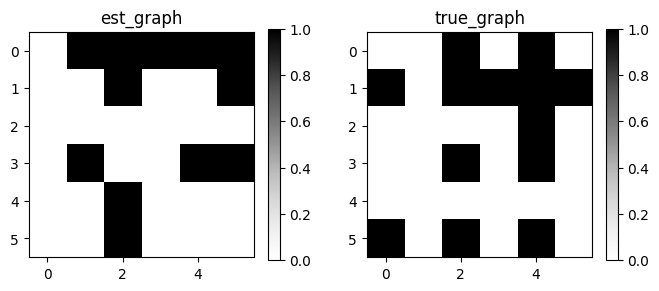

{'fdr': 0.5, 'tpr': 0.4615, 'fpr': 3.0, 'shd': 9, 'nnz': 12, 'precision': 0.5, 'recall': 0.4615, 'F1': 0.48, 'gscore': 0.0}


In [ ]:
from castle.algorithms import DirectLiNGAM
from castle.datasets import load_dataset
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
# X, true_dag, _ = load_dataset(name='IID_Test')
n = DirectLiNGAM()
n.learn(X)
GraphDAG(n.causal_matrix, true_dag, save_name='Result_DirectLiNGAM')
met = MetricsDAG(n.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_DirectLiNGAM.csv')

##__M 4: ICALiNGAM__
* An ICA-based learning algorithm for linear non-Gaussian acyclic model (LiNGAM)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


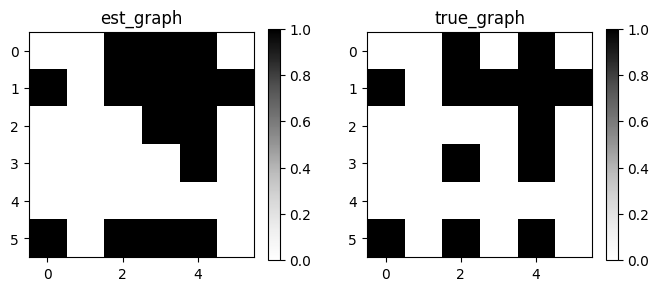

{'fdr': 0.2, 'tpr': 0.9231, 'fpr': 1.5, 'shd': 3, 'nnz': 15, 'precision': 0.8, 'recall': 0.9231, 'F1': 0.8571, 'gscore': 0.6923}


In [ ]:
from castle.algorithms import ICALiNGAM
from castle.datasets import load_dataset
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
# X, true_dag, _ = load_dataset(name='IID_Test')
n = ICALiNGAM()
n.learn(X)
GraphDAG(n.causal_matrix, true_dag, save_name='Result_ICALiNGAM')
met = MetricsDAG(n.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_ICALiNGAM.csv')

##__M 5: PNL*__
* Causal discovery based on the post-nonlinear causal assumption

In [ ]:
from castle.algorithms.gradient.pnl.torch.pnl import PNL
from castle.datasets import load_dataset
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
# X, true_dag, _ = load_dataset('IID_Test')
n = PNL()
n.learn(X)
GraphDAG(n.causal_matrix, true_dag, save_name='Result_PNL')
met = MetricsDAG(n.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_PNL.csv')

ModuleNotFoundError: No module named 'castle.algorithms.gradient.pnl'

# IID/Score-based

##__M 6: GES*__
*	A classical Greedy Equivalence Search algorithm

In [ ]:
from castle.algorithms import GES
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import load_dataset

# X, true_dag, _ = load_dataset(name='IID_Test')
algo = GES()
algo.learn(X)
GraphDAG(algo.causal_matrix, true_dag, save_name='result_ges')
met = MetricsDAG(algo.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_ges.csv')

ImportError: cannot import name 'GES' from 'castle.algorithms' (/usr/local/lib/python3.10/dist-packages/castle/algorithms/__init__.py)

# IID/Gradient-based

##__M 7: NOTEARS_Linear__
* A gradient-based algorithm for linear data models (typically with least-squares loss)

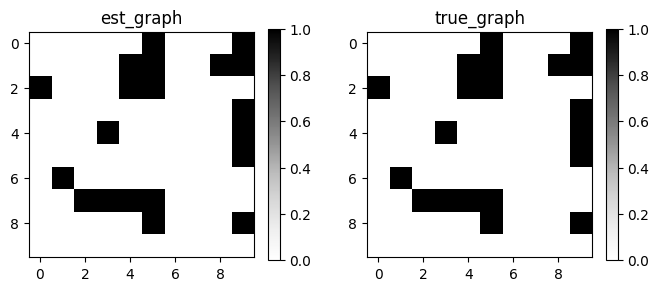

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 20, 'precision': 1.0, 'recall': 1.0, 'F1': 1.0, 'gscore': 1.0}


In [ ]:
from castle.algorithms import Notears
from castle.datasets import load_dataset
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
# X, true_dag, _ = load_dataset('IID_Test')
n = Notears()
n.learn(X)
GraphDAG(n.causal_matrix, true_dag, save_name='Result_Notearslinear')
met = MetricsDAG(n.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_Notearslinear.csv')

##__M 8: NOTEARS_Nonlinear_MLP_SOB__
* A gradient-based algorithm using neural network modeling for non-linear causal relationships
* A gradient-based algorithm using Sobolev space modeling for non-linear causal relationships

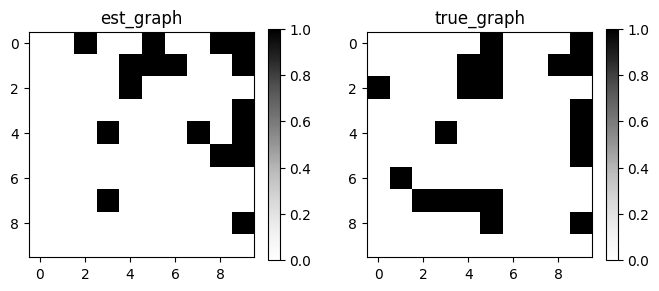

{'fdr': 0.2941, 'tpr': 0.6, 'fpr': 0.2, 'shd': 9, 'nnz': 17, 'precision': 0.7059, 'recall': 0.6, 'F1': 0.6486, 'gscore': 0.35}


In [ ]:
from castle.algorithms import NotearsNonlinear
from castle.datasets import load_dataset
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
# X, true_dag, _ = load_dataset('IID_Test')
n = NotearsNonlinear()
n.learn(X)
GraphDAG(n.causal_matrix, true_dag, save_name='Result_NotearsNonlinear')
met = MetricsDAG(n.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_NotearsNonlinear.csv')

##__M 9: NOTEARS-lOW-RANK__
* Adapting NOTEARS for large problems with low-rank causal graphs

2023-04-05 17:40:21,178 - C:\Users\notebook\castle\algorithms\gradient\notears\low_rank.py[line:205] - INFO: [start]: n=2000, d=10, iter_=15, h_=1e-06, rho_=1e+20
C:\Users\notebook\castle\algorithms\gradient\notears\low_rank.py:153: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
C:\Users\notebook\castle\algorithms\gradient\notears\low_rank.py:172: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * 2 * \
C:\Users\notebook\castle\algorithms\gradient\notears\low_rank.py:184: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * 2 * \
C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\_matfuncs.py:375: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
C:\Users\notebook\castle\algorithms\gradient\notears\low_rank.py:173: RuntimeWarning: invalid value encountered in matmul
  np.matmul(E.T * W, v)
C:\Users\

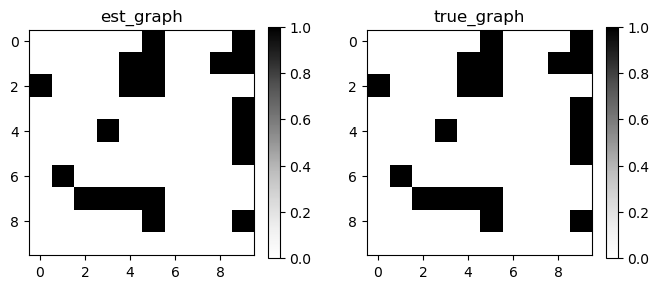

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 20, 'precision': 1.0, 'recall': 1.0, 'F1': 1.0, 'gscore': 1.0}


In [ ]:
import numpy as np
from castle.algorithms import NotearsLowRank
from castle.datasets import load_dataset
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
# X, true_dag, _ = load_dataset('IID_Test')
rank = np.linalg.matrix_rank(true_dag)
n = NotearsLowRank()
n.learn(X, rank=rank)
GraphDAG(n.causal_matrix, true_dag, save_name='Result_NotearsLowRank')
met = MetricsDAG(n.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_NotearsLowRank.csv')

##__M 10: DAG-GNN__
* DAG Structure Learning with Graph Neural Networks

2023-04-05 17:44:01,665 - C:\Users\notebook\castle\algorithms\gradient\dag_gnn\torch\dag_gnn.py[line:165] - INFO: GPU is available.
2023-04-05 17:44:45,446 - C:\Users\notebook\castle\algorithms\gradient\dag_gnn\torch\dag_gnn.py[line:253] - INFO: Iter: 0, epoch: 299, h_new: 0.06046934230157852
2023-04-05 17:46:02,916 - C:\Users\notebook\castle\algorithms\gradient\dag_gnn\torch\dag_gnn.py[line:253] - INFO: Iter: 1, epoch: 299, h_new: 0.0037533286602506877
2023-04-05 17:47:19,168 - C:\Users\notebook\castle\algorithms\gradient\dag_gnn\torch\dag_gnn.py[line:253] - INFO: Iter: 2, epoch: 299, h_new: 0.0006320721989414579
2023-04-05 17:48:34,799 - C:\Users\notebook\castle\algorithms\gradient\dag_gnn\torch\dag_gnn.py[line:253] - INFO: Iter: 3, epoch: 299, h_new: 0.00032116626072564713
2023-04-05 17:49:16,357 - C:\Users\notebook\castle\algorithms\gradient\dag_gnn\torch\dag_gnn.py[line:253] - INFO: Iter: 4, epoch: 299, h_new: 4.6692305740947404e-05
2023-04-05 17:51:16,879 - C:\Users\notebook\cast

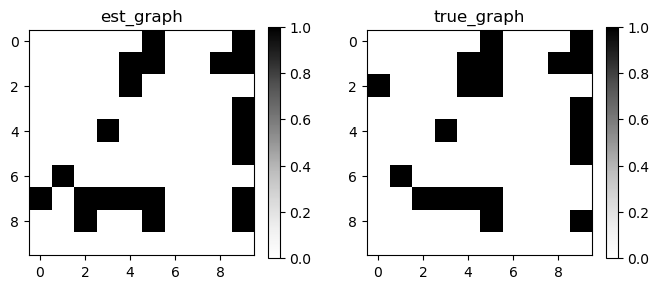

{'fdr': 0.1429, 'tpr': 0.9, 'fpr': 0.12, 'shd': 5, 'nnz': 21, 'precision': 0.8571, 'recall': 0.9, 'F1': 0.878, 'gscore': 0.75}


In [ ]:
from castle.algorithms.gradient.dag_gnn.torch import DAG_GNN
from castle.datasets import load_dataset
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
# X, true_dag, _ = load_dataset('IID_Test')
m = DAG_GNN()
m.learn(X)
GraphDAG(m.causal_matrix, true_dag, save_name='Result_DAG_GNN')
met = MetricsDAG(m.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_DAG_GNN.csv')

##__M 11: GOLEM__
* A more efficient version of NOTEARS that can reduce the number of optimization iterations

2023-04-05 18:00:32,616 - C:\Users\notebook\castle\algorithms\gradient\notears\torch\golem.py[line:120] - INFO: GPU is available.
2023-04-05 18:00:32,624 - C:\Users\notebook\castle\algorithms\gradient\notears\torch\golem.py[line:207] - INFO: Started training for 100000 iterations.
2023-04-05 18:00:32,627 - C:\Users\notebook\castle\algorithms\gradient\notears\torch\golem.py[line:220] - INFO: [Iter 0] score=67.199, likelihood=67.199, h=0.0e+00
2023-04-05 18:00:47,584 - C:\Users\notebook\castle\algorithms\gradient\notears\torch\golem.py[line:220] - INFO: [Iter 5000] score=50.079, likelihood=49.589, h=5.0e-04
2023-04-05 18:01:01,878 - C:\Users\notebook\castle\algorithms\gradient\notears\torch\golem.py[line:220] - INFO: [Iter 10000] score=50.070, likelihood=49.577, h=3.8e-04
2023-04-05 18:01:13,937 - C:\Users\notebook\castle\algorithms\gradient\notears\torch\golem.py[line:220] - INFO: [Iter 15000] score=50.070, likelihood=49.577, h=3.7e-04
2023-04-05 18:01:24,871 - C:\Users\notebook\castle\

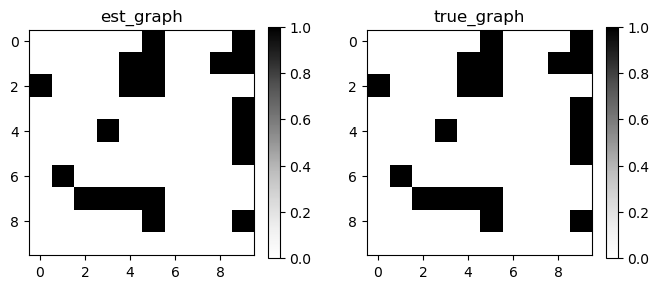

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 20, 'precision': 1.0, 'recall': 1.0, 'F1': 1.0, 'gscore': 1.0}


In [ ]:
from castle.algorithms import GOLEM
from castle.datasets import load_dataset
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
# X, true_dag, _= load_dataset(name='IID_Test')
n = GOLEM()
n.learn(X)
GraphDAG(n.causal_matrix, true_dag, save_name='GOLEM')
met = MetricsDAG(n.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_GOLEM.csv')

##__M 12: GraNDAG_Mindspore__
* A gradient-based algorithm using neural network modeling for non-linear additive noise data

2023-04-05 18:05:33,704 - C:\Users\notebook\castle\algorithms\gradient\gran_dag\torch\gran_dag.py[line:269] - INFO: GPU is available.
Training Iterations: 100%|██████████████████████████████████████████████████████| 10000/10000 [01:29<00:00, 111.28it/s]


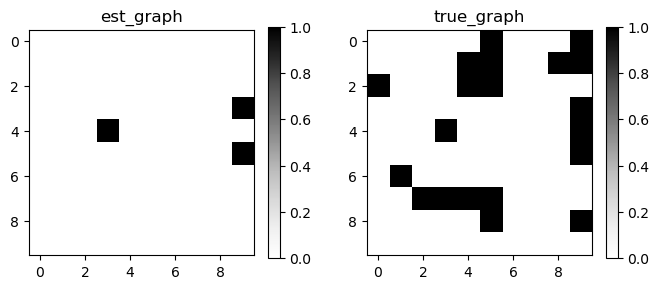

{'fdr': 0.0, 'tpr': 0.15, 'fpr': 0.0, 'shd': 17, 'nnz': 3, 'precision': 1.0, 'recall': 0.15, 'F1': 0.2609, 'gscore': 0.15}


In [ ]:
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import DAG, IIDSimulation
from castle.algorithms import GraNDAG

# load data
weighted_random_dag = DAG.erdos_renyi(n_nodes=10, n_edges=20,
                                      weight_range=(0.5, 2.0), seed=1)
# dataset = IIDSimulation(W=weighted_random_dag, n=2000, method='nonlinear',sem_type='mlp')
# dag, x = dataset.B, dataset.X
dag, x = true_dag,X

# Instantiation algorithm
d = {'model_name': 'NonLinGauss', 'nonlinear': 'leaky-relu', 'optimizer': 'sgd', 'norm_prod': 'paths', 'device_type': 'gpu'}
gnd = GraNDAG(input_dim=x.shape[1], )
gnd.learn(data=x)

# plot predict_dag and true_dag
GraphDAG(gnd.causal_matrix, dag, save_name='Result_GraNDAG')
met = MetricsDAG(gnd.causal_matrix, dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_GraNDAG.csv')

##__M 13: MCSL__
* A gradient-based algorithm for non-linear additive noise data by learning the binary adjacency matrix

2023-04-05 18:16:46,236 - C:\Users\notebook\castle\algorithms\gradient\mcsl\torch\mcsl.py[line:142] - INFO: GPU is available.
2023-04-05 18:16:46,248 - C:\Users\notebook\castle\algorithms\gradient\mcsl\torch\trainers\al_trainer.py[line:58] - INFO: Current epoch: 1==================
2023-04-05 18:16:46,310 - C:\Users\notebook\castle\algorithms\gradient\mcsl\torch\trainers\al_trainer.py[line:97] - INFO: Current loss in step 0: 172.21960756363447
2023-04-05 18:16:56,996 - C:\Users\notebook\castle\algorithms\gradient\mcsl\torch\trainers\al_trainer.py[line:97] - INFO: Current loss in step 200: 2.0705390402262447
2023-04-05 18:17:07,154 - C:\Users\notebook\castle\algorithms\gradient\mcsl\torch\trainers\al_trainer.py[line:97] - INFO: Current loss in step 400: 1.7566800846478867
2023-04-05 18:17:17,265 - C:\Users\notebook\castle\algorithms\gradient\mcsl\torch\trainers\al_trainer.py[line:97] - INFO: Current loss in step 600: 1.6667374272769206
2023-04-05 18:17:27,381 - C:\Users\notebook\castle\

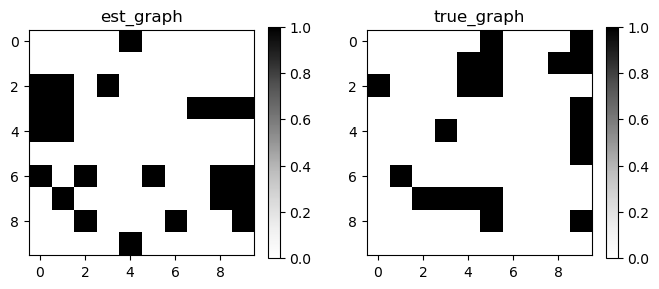

{'fdr': 0.8571, 'tpr': 0.15, 'fpr': 0.72, 'shd': 32, 'nnz': 21, 'precision': 0.1304, 'recall': 0.15, 'F1': 0.1395, 'gscore': 0.0}


In [ ]:
from castle.algorithms import MCSL
from castle.datasets import load_dataset
from castle.common import GraphDAG
from castle.metrics import MetricsDAG

# X, true_dag, _ = load_dataset(name='IID_Test')

n = MCSL(iter_step=1000, init_rho=1e-5,rho_multiply=10, l1_graph_penalty=2e-3)
n.learn(X)
GraphDAG(n.causal_matrix, true_dag, save_name='Result_mcsl')
met = MetricsDAG(n.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_MCSL.csv')

##__M 14: GAE__
*	A gradient-based algorithm using graph autoencoder to model non-linear causal relationships

2023-04-04 16:18:38,921 - C:\Users\notebook\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2023-04-04 16:18:38,923 - C:\Users\notebook\castle\algorithms\gradient\gae\torch\gae.py[line:144] - INFO: GPU is available.
2023-04-04 16:18:38,934 - C:\Users\notebook\castle\algorithms\gradient\gae\torch\trainers\al_trainer.py[line:58] - INFO: Current epoch: 1==================
2023-04-04 16:18:38,954 - C:\Users\notebook\castle\algorithms\gradient\gae\torch\trainers\al_trainer.py[line:104] - INFO: Current loss in step 0: 173.0023464933411
2023-04-04 16:18:40,553 - C:\Users\notebook\castle\algorithms\gradient\gae\torch\trainers\al_trainer.py[line:104] - INFO: Current loss in step 200: 89.04092049739704
2023-04-04 16:18:41,982 - C:\Users\notebook\castle\algorithms\gradient\gae\torch\trainers\al_trainer.py[line:104] - INFO: Current loss in step 400: 22.93267801980251
2023-04-04 16:18:43,348 - C:\Users\notebook\castle\algorithms\gradient\gae\torch\trainers\al_trainer.py[li

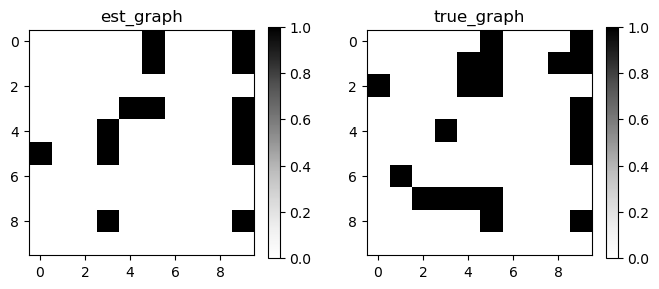

{'fdr': 0.1818, 'tpr': 0.45, 'fpr': 0.08, 'shd': 13, 'nnz': 11, 'precision': 0.6429, 'recall': 0.45, 'F1': 0.5294, 'gscore': 0.2}


In [ ]:
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import DAG, IIDSimulation
from castle.algorithms import GAE


#######################################
# graph_auto_encoder used simulate data
#######################################
# simulate data for graph-auto-encoder
weighted_random_dag = DAG.erdos_renyi(n_nodes=10, n_edges=20, weight_range=(0.5, 2.0), seed=1)
dataset = IIDSimulation(W=weighted_random_dag, n=2000, method='linear', sem_type='gauss')
true_dag, X = dataset.B, dataset.X

ga = GAE(input_dim=10)
ga.learn(X)

# plot est_dag and true_dag
GraphDAG(ga.causal_matrix, true_dag, save_name='Result_gae')

# calculate accuracy
met = MetricsDAG(ga.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_gae.csv')

##__M 15: RL*__
* A RL-based algorithm that can work with flexible score functions (including non-smooth ones)

In [ ]:
from castle.algorithms import RL
from castle.datasets import load_dataset
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
# X, true_dag, _ = load_dataset('IID_Test')
n = RL()
n.learn(X)
GraphDAG(n.causal_matrix, true_dag, save_name='Result_RL')
met = MetricsDAG(n.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_RL.csv')

2023-04-05 10:34:53,809 - C:\Users\notebook\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2023-04-05 10:34:53,814 - C:\Users\notebook\castle\algorithms\gradient\rl\torch\rl.py[line:222] - INFO: GPU is available.
2023-04-05 10:34:53,846 - C:\Users\notebook\castle\algorithms\gradient\rl\torch\rl.py[line:264] - INFO: Python version is 3.9.13
2023-04-05 10:34:54,101 - C:\Users\notebook\castle\algorithms\gradient\rl\torch\rl.py[line:289] - INFO: Original sl: 1.1201855398449987, su: 5.838377459109804, strue: -8.879814460155002
2023-04-05 10:34:54,107 - C:\Users\notebook\castle\algorithms\gradient\rl\torch\rl.py[line:290] - INFO: Transfomed sl: 1.1201855398449987, su: 5.838377459109804, lambda2: 0.001, true: -10.59727981726336
2023-04-05 10:34:54,178 - C:\Users\notebook\castle\algorithms\gradient\rl\torch\rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-04-05 10:34:54,187 - C:\Users\notebook\castle\algorithms\gradient\rl\torch\rl.py[

KeyboardInterrupt: 

##__M 16: CORL*__
* A RL- and order-based algorithm that improves the efficiency and scalability of previous RL-based approach

In [ ]:
from castle.algorithms.gradient.corl.torch import CORL
from castle.datasets import load_dataset
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
# X, true_dag, _ = load_dataset('IID_Test')
n = CORL()
n.learn(X)
GraphDAG(n.causal_matrix, true_dag, save_name='Result_CORL')
met = MetricsDAG(n.causal_matrix, true_dag)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_CORL.csv')

2023-04-06 13:08:50,671 - C:\Users\notebook\castle\algorithms\gradient\corl\torch\corl.py[line:173] - INFO: GPU is available.
2023-04-06 13:08:50,682 - C:\Users\notebook\castle\algorithms\gradient\corl\torch\corl.py[line:233] - INFO: Python version is 3.9.13
2023-04-06 13:08:50,722 - C:\Users\notebook\castle\algorithms\gradient\corl\torch\corl.py[line:277] - INFO: Shape of input batch: 64, 3, 100
2023-04-06 13:08:50,723 - C:\Users\notebook\castle\algorithms\gradient\corl\torch\corl.py[line:279] - INFO: Shape of input batch: 64, 3, 256
2023-04-06 13:08:50,724 - C:\Users\notebook\castle\algorithms\gradient\corl\torch\corl.py[line:281] - INFO: Starting training.
  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]C:\Users\notebook\castle\algorithms\gradient\corl\torch\corl.py:334: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray wi

KeyboardInterrupt: 

# EventSequence/Function-based

##__M 17: TTPM__
*	A causal structure learning algorithm based on Topological Hawkes process for spatio-temporal event sequences

2023-04-06 12:44:18,769 - C:\Users\notebook\castle\backend\__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2023-04-06 12:44:19,079 - C:\Users\notebook\castle\algorithms\__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.
100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 5063.14it/s]
2023-04-06 12:44:19,526 - C:\Users\notebook\castle\algorithms\ttpm\ttpm.py[line:225] - INFO: [iter 0]: likelihood_score = -5957.134209880932
2023-04-06 12:44:19,862 - C:\Users\notebook\castle\algorithms\ttpm\ttpm.py[line:225] - INFO: [iter 1]: likelihood_score = -5897.55306114358
2023-04-06 12:44:20,279 - C:\Users\notebook\castle\algorithms\ttpm\ttpm.py[line:225] - INFO: [iter 2]: likelihood_score = -5841.039885736854
2023-04-06 12:44:20,641 - C:\Users\notebook\castle\algorithms\ttpm\ttpm.py[line:225] - INFO: [iter 3]: likelihood_score = -5790.7452051866

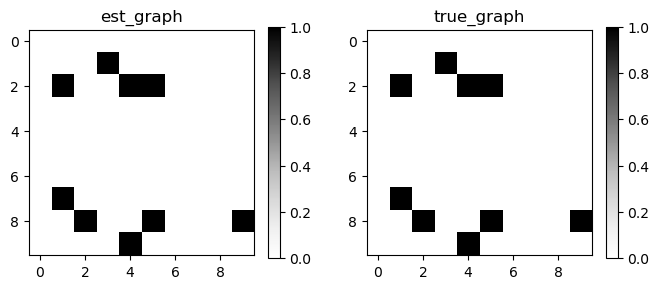

{'fdr': 0.0,
 'tpr': 1.0,
 'fpr': 0.0,
 'shd': 0,
 'nnz': 9,
 'precision': 1.0,
 'recall': 1.0,
 'F1': 1.0,
 'gscore': 1.0}

In [ ]:
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import load_dataset
from castle.algorithms import TTPM
# Data Simulation for TTPM
X, true_causal_matrix, topology_matrix = load_dataset('THP_Test')
ttpm = TTPM(topology_matrix, max_hop=2)
ttpm.learn(X)
causal_matrix = ttpm.causal_matrix
# plot est_dag and true_dag
GraphDAG(ttpm.causal_matrix, true_causal_matrix, save_name='Result_ttpm')
    # calculate accuracy
met = MetricsDAG(ttpm.causal_matrix, true_causal_matrix)
print(met.metrics)
df = pd.DataFrame([met.metrics])
df.to_csv('Scores_ttpm.csv')